In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop('species',axis=1)
y = df['species']

In [5]:
from sklearn.cluster import KMeans

### Finding the optimal number of clusters using the inertia of the models

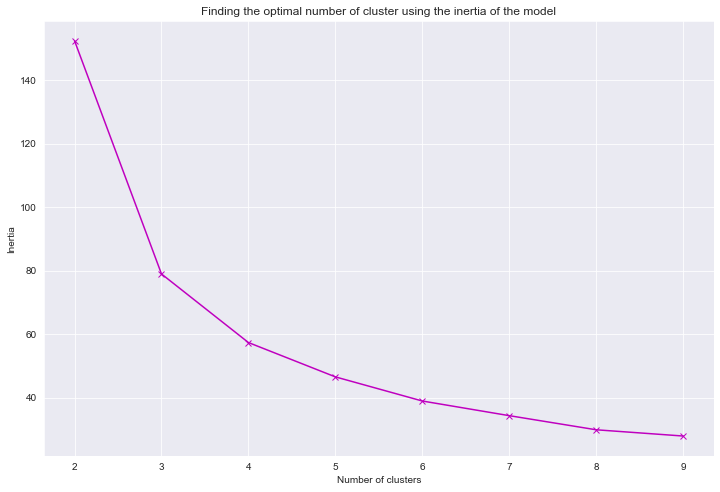

In [11]:
inertia_list = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), inertia_list, 'mx',ls='solid')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding the optimal number of cluster using the inertia of the model');

**By the looks of it we can conclude that the n_cluster=3 will give us the satisfactory results**

### Finding the optimal number of solutions using the silhouette score of the model

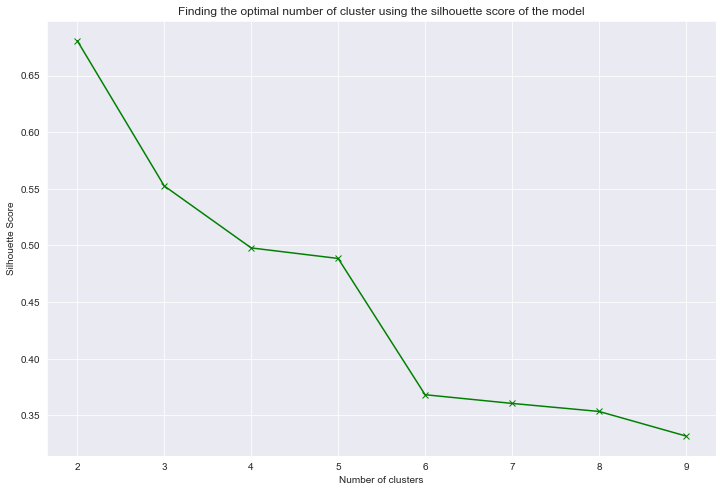

In [12]:
from sklearn.metrics import silhouette_score
sil_score_list = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sil_score_list.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), sil_score_list, 'gx',ls='solid')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding the optimal number of cluster using the silhouette score of the model');

**By looking at the graph it feels like as the optimal number of clusters for the model should be 2**

In [14]:
## let's cluster the data into 2 clusters
kmeans_final = KMeans(n_clusters=2)
kmeans_final.fit(X)
cluster_assigned = kmeans_final.predict(X)

In [15]:
cluster_assigned

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
## finding the array containing the distance of the instances from each of the cluster
dist = kmeans_final.transform(X)

In [17]:
dist

array([[0.25017616, 4.08915352],
       [0.41860437, 4.10830705],
       [0.44248803, 4.27617968],
       [0.49406229, 4.14001609],
       [0.30272878, 4.13570588],
       [0.69141869, 3.76000949],
       [0.43884862, 4.21548951],
       [0.11551115, 4.01957084],
       [0.78292111, 4.30308463],
       [0.34414701, 4.06426991],
       [0.53159017, 3.95906128],
       [0.23055183, 4.00444872],
       [0.48383628, 4.18061817],
       [0.93654493, 4.63183084],
       [1.08590602, 4.22571183],
       [1.25665902, 4.03657776],
       [0.7265474 , 4.11153033],
       [0.23420559, 4.0536405 ],
       [0.83335161, 3.70992556],
       [0.45406279, 4.0234674 ],
       [0.42884597, 3.73264247],
       [0.37485015, 3.9681777 ],
       [0.73890753, 4.61648115],
       [0.27599459, 3.69635391],
       [0.40718013, 3.75637482],
       [0.37308428, 3.90185539],
       [0.12417044, 3.86223337],
       [0.26268461, 3.97356487],
       [0.27116693, 4.04701   ],
       [0.35838131, 4.02249362],
       [0.